![sql](img/sql-logo.jpg)

# A beginner's guide to databases, SQL, & using them with `pandas`

**Scenario:** You are a data analyst for the Homeland Security, trying to create reports on the active airports world wide. The data you need to access is in a SQL database. YOu need to be able to query for the data in a database!

## Learning goals:
- Goal 1: Summarize the use case for sql in the data science skill set
- Goal 2: Define key sql terminology
- Goal 3: Get information about DB schema and table structure
- Goal 4: Use basic SQL commands:
    - Construct SQL queries
    - Use JOIN to merge tables along logical columns
    - Grouping Data with SQL
- Goal 5: Query data from pandas dataframes using SQL

## Goal 1: Summarize

[Netflix has a great article](https://medium.com/netflix-techblog/notebook-innovation-591ee3221233) describing three different data roles at their company, their different needs, and their toolsets.

![netflix](img/netflix-data-roles.jpeg)

Examining that graphic, SQL shows up as one of the tools of the _Data Engineer_ 

Data Engineers provide the essential data architecture services that make data science possible.

![hierarchy](img/ai-hierachy.png)

[Source: Monica Rogati’s fantastic Medium post “The AI Hierarchy of Needs”
](https://hackernoon.com/the-ai-hierarchy-of-needs-18f111fcc007)

![etl](img/etl.png)

[img source: Jeff Hammerbacher’s slide from UC Berkeley CS 194 course ](https://bcourses.berkeley.edu/courses/1377158/pages/cs-194-16-introduction-to-data-science-fall-2015)

### What is a Relational Database? 

![rdb](img/relational-dbms-model.png)
[reference for image ](https://www.studytonight.com/dbms/database-model.php)

### POPULAR RDBMS

- SQLite
- MySQL
- PostgreSql
- Oracle DB
- SQL Server

***
## Goal 2: Database terminology

### Relational Database Schema

![schema](img/MySQL_Schema_Music_Example.png)

[source of image](https://database.guide/what-is-a-database-schema/)

### Table columns view
![table example](img/columns.png)

### Terminology

- Schema: A schema in a SQL database is a collection of logical structures of data.

- Primary Key: A primary key is a key in a relational database that is unique for each record. 

- Foreign Key: A foreign key is a column that references a column of another table. 

- Structured query language: A standard computer language for database management and manipulation. It can be used to query, insert, update and modify data

***
### SQLite

![sqlite](img/SQLite-Python.jpg)

"SQLite is a C library that provides a lightweight disk-based database that doesn’t require a separate server process and allows accessing the database using a nonstandard variant of the SQL query language. Some applications can use SQLite for internal data storage. It’s also possible to prototype an application using SQLite and then port the code to a larger database such as PostgreSQL or Oracle." - [sqlite documentation](https://docs.python.org/2/library/sqlite3.html)



## But what about connecting to database servers?

To connect to an Oracle database server there is a different package, `cx_Oracle`. The documentation for that package is [here](https://oracle.github.io/python-cx_Oracle/)

***
## Goal 4: Use basic SQL commands 
- Construct SQL queries
- Use JOIN to merge tables along logical columns
- Grouping Data with SQL

### Construct SQL queries

**Select**
What columns do you want to grab? 


**Select**:  `distinct`, using `as` to rename columns, `count` single number aggregates

**From** From what table? 

**From:** also uses aliasing with `as`

**Where** What conditions do you want to apply to this? 

**Where**: equals is only one `=`, `between`, `in`, wildcards `%`, `AND`, `OR`, `NOT`

**Order by** What column do you want to order by? 

Asc or Dsc

**Limit** how many rows do you want to pull? 

<img src="Database-Schema.png">


***
## Goal 3: Get going with sqlite!

In [53]:
import sqlite3

#### Load a DB object with `connect` and `cursor`

In [54]:
con = sqlite3.connect('data.sqlite')
c = con.cursor()

#### Use sqlite_master to find all the tables in the schema
Get the schema of a database from a db in sqlite

In [55]:
c.execute("SELECT * FROM employees;")
print(c.fetchall())

[('1002', 'Murphy', 'Diane', 'x5800', 'dmurphy@classicmodelcars.com', '1', '', 'President'), ('1056', 'Patterson', 'Mary', 'x4611', 'mpatterso@classicmodelcars.com', '1', '1002', 'VP Sales'), ('1076', 'Firrelli', 'Jeff', 'x9273', 'jfirrelli@classicmodelcars.com', '1', '1002', 'VP Marketing'), ('1088', 'Patterson', 'William', 'x4871', 'wpatterson@classicmodelcars.com', '6', '1056', 'Sales Manager (APAC)'), ('1102', 'Bondur', 'Gerard', 'x5408', 'gbondur@classicmodelcars.com', '4', '1056', 'Sale Manager (EMEA)'), ('1143', 'Bow', 'Anthony', 'x5428', 'abow@classicmodelcars.com', '1', '1056', 'Sales Manager (NA)'), ('1165', 'Jennings', 'Leslie', 'x3291', 'ljennings@classicmodelcars.com', '1', '1143', 'Sales Rep'), ('1166', 'Thompson', 'Leslie', 'x4065', 'lthompson@classicmodelcars.com', '1', '1143', 'Sales Rep'), ('1188', 'Firrelli', 'Julie', 'x2173', 'jfirrelli@classicmodelcars.com', '2', '1143', 'Sales Rep'), ('1216', 'Patterson', 'Steve', 'x4334', 'spatterson@classicmodelcars.com', '2', '

But we can convert this to a table!

In [56]:
c.description

(('employeeNumber', None, None, None, None, None, None),
 ('lastName', None, None, None, None, None, None),
 ('firstName', None, None, None, None, None, None),
 ('extension', None, None, None, None, None, None),
 ('email', None, None, None, None, None, None),
 ('officeCode', None, None, None, None, None, None),
 ('reportsTo', None, None, None, None, None, None),
 ('jobTitle', None, None, None, None, None, None))

In [57]:
import pandas as pd
c.execute("""select * from offices""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,officeCode,city,phone,addressLine1,addressLine2,state,country,postalCode,territory
0,1,San Francisco,+1 650 219 4782,100 Market Street,Suite 300,CA,USA,94080,NA
1,2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA
2,3,NYC,+1 212 555 3000,523 East 53rd Street,apt. 5A,NY,USA,10022,NA
3,4,Paris,+33 14 723 4404,43 Rue Jouffroy D'abbans,,,France,75017,EMEA
4,5,Tokyo,+81 33 224 5000,4-1 Kioicho,,Chiyoda-Ku,Japan,102-8578,Japan


In [58]:
#select customers froma 
c.execute("""select * from customers where city = 'Boston';""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,362,Gifts4AllAges.com,Yoshido,Juri,6175559555,8616 Spinnaker Dr.,,Boston,MA,51003,USA,1216,41900.00
1,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,,Boston,MA,51003,USA,1188,85100.00


What if we want to grab more than one city?

In [63]:
c.execute("select * from customers where city = 'Boston' or city = 'Madrid';")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,141,Euro+ Shopping Channel,Freyre,Diego,(91) 555 94 44,"C/ Moralzarzal, 86",,Madrid,,28034,Spain,1370,227600.00
1,237,ANG Resellers,Camino,Alejandra,(91) 745 6555,"Gran Vía, 1",,Madrid,,28001,Spain,,0.00
2,344,CAF Imports,Fernandez,Jesus,+34 913 728 555,Merchants House,27-30 Merchant's Quay,Madrid,,28023,Spain,1702,59600.00
3,362,Gifts4AllAges.com,Yoshido,Juri,6175559555,8616 Spinnaker Dr.,,Boston,MA,51003,USA,1216,41900.00
4,458,"Corrida Auto Replicas, Ltd",Sommer,Martín,(91) 555 22 82,"C/ Araquil, 67",,Madrid,,28023,Spain,1702,104600.00
5,465,"Anton Designs, Ltd.",Anton,Carmen,+34 913 728555,"c/ Gobelas, 19-1 Urb. La Florida",,Madrid,,28023,Spain,,0.00
6,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,,Boston,MA,51003,USA,1188,85100.00


What if we want to check for two conditions

In [64]:
c.execute("""select *
             from customers
             where (city = 'Boston' or city = 'Madrid')
                   and (postalCode > 50000.00)
             ;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,141,Euro+ Shopping Channel,Freyre,Diego,(91) 555 94 44,"C/ Moralzarzal, 86",,Madrid,,28034,Spain,1370,227600.00
1,237,ANG Resellers,Camino,Alejandra,(91) 745 6555,"Gran Vía, 1",,Madrid,,28001,Spain,,0.00
2,344,CAF Imports,Fernandez,Jesus,+34 913 728 555,Merchants House,27-30 Merchant's Quay,Madrid,,28023,Spain,1702,59600.00
3,362,Gifts4AllAges.com,Yoshido,Juri,6175559555,8616 Spinnaker Dr.,,Boston,MA,51003,USA,1216,41900.00
4,458,"Corrida Auto Replicas, Ltd",Sommer,Martín,(91) 555 22 82,"C/ Araquil, 67",,Madrid,,28023,Spain,1702,104600.00
5,465,"Anton Designs, Ltd.",Anton,Carmen,+34 913 728555,"c/ Gobelas, 19-1 Urb. La Florida",,Madrid,,28023,Spain,,0.00
6,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,,Boston,MA,51003,USA,1188,85100.00


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
customerNumber            7 non-null object
customerName              7 non-null object
contactLastName           7 non-null object
contactFirstName          7 non-null object
phone                     7 non-null object
addressLine1              7 non-null object
addressLine2              7 non-null object
city                      7 non-null object
state                     7 non-null object
postalCode                7 non-null object
country                   7 non-null object
salesRepEmployeeNumber    7 non-null object
creditLimit               7 non-null object
dtypes: object(13)
memory usage: 808.0+ bytes


What if we want to order by Names? 

In [62]:
c.execute("""select distinct *
             from customers
             order by customerName ASC
             ;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,237,ANG Resellers,Camino,Alejandra,(91) 745 6555,"Gran Vía, 1",,Madrid,,28001,Spain,,0.00
1,187,"AV Stores, Co.",Ashworth,Rachel,(171) 555-1555,Fauntleroy Circus,,Manchester,,EC2 5NT,UK,1501,136800.00
2,242,Alpha Cognac,Roulet,Annette,61.77.6555,1 rue Alsace-Lorraine,,Toulouse,,31000,France,1370,61100.00
3,168,American Souvenirs Inc,Franco,Keith,2035557845,149 Spinnaker Dr.,Suite 101,New Haven,CT,97823,USA,1286,0.00
4,249,Amica Models & Co.,Accorti,Paolo,011-4988555,Via Monte Bianco 34,,Torino,,10100,Italy,1401,113000.00


What if we need to combine two different tables? 

### SQL Joins

SQL joins can be used to both **add** data to a table and **remove** data from a table. 

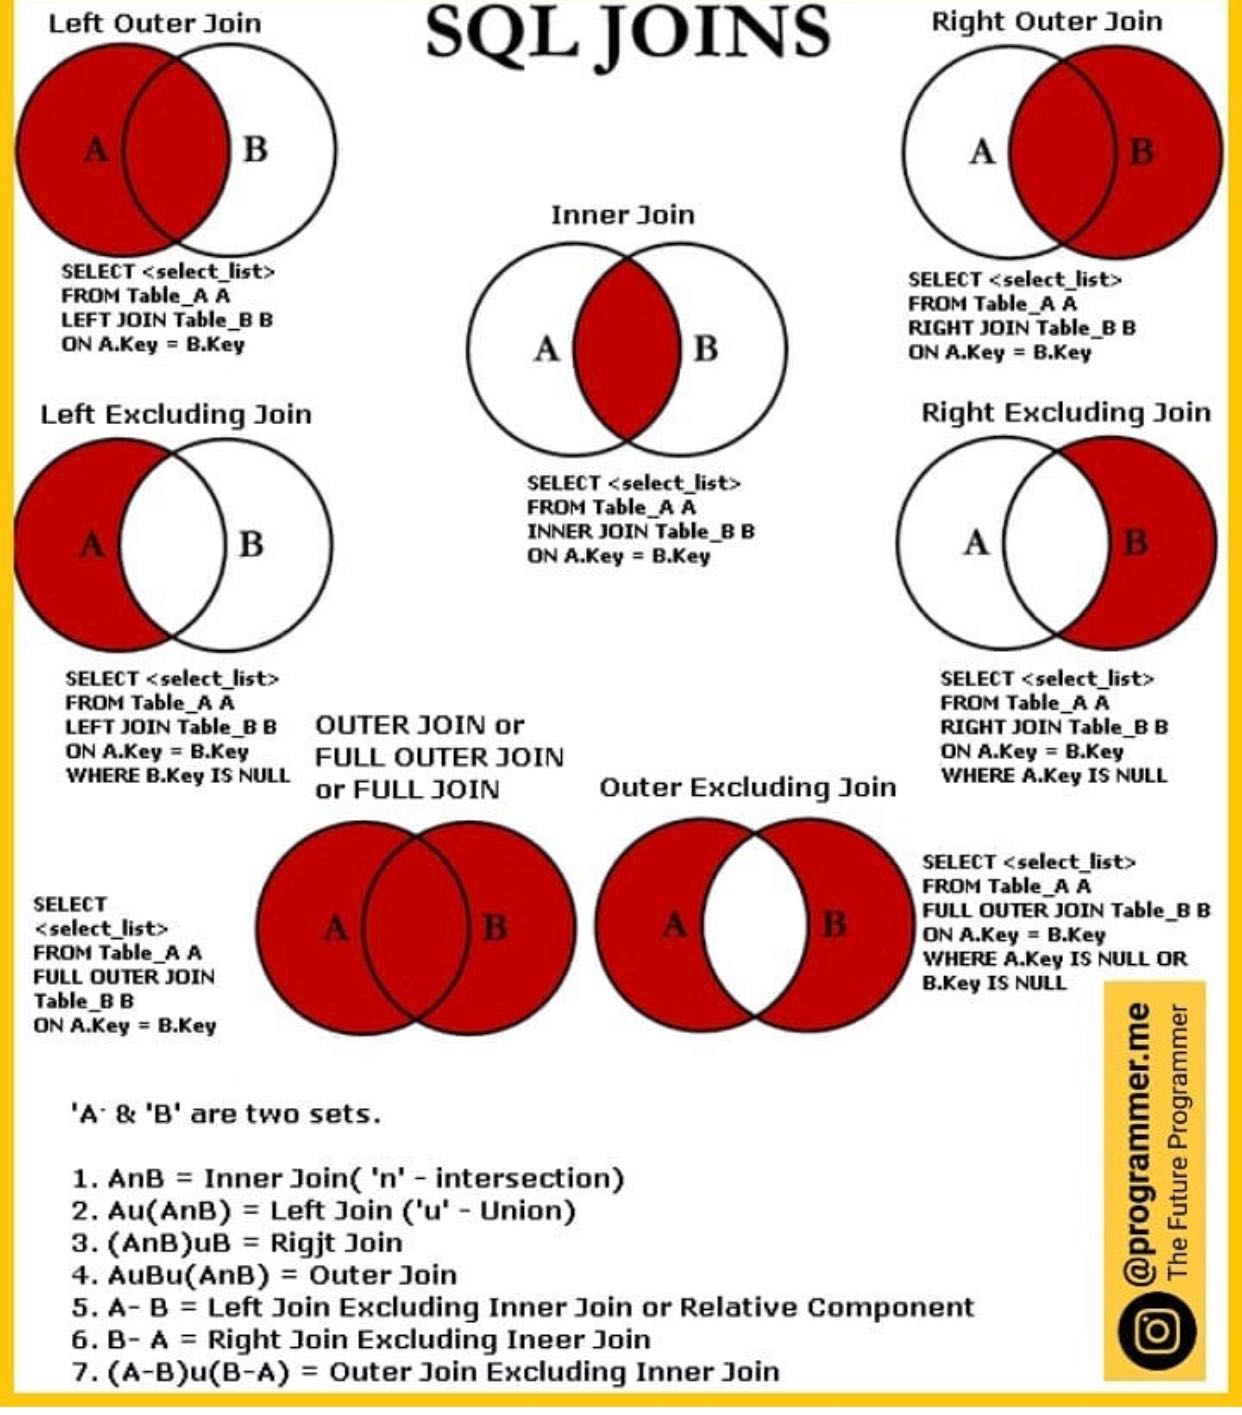

In [68]:
from IPython.display import Image
Image(filename='SQL_Joins .jpg') 

In [9]:
c.execute("""select  *
             from customers
             full outer join employees
             on customers.salesRepEmployeeNumber = employees.EmployeeNumber
             ;""")
df2 = pd.DataFrame(c.fetchall())
df2.columns = [x[0] for x in c.description]
df2.head()

OperationalError: RIGHT and FULL OUTER JOINs are not currently supported

In [10]:
c.execute("""select  *
             from customers
             ;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",,Nantes,,44000,France,1370,21000.00
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,,Las Vegas,NV,83030,USA,1166,71800.00
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611,117300.00
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",,Nantes,,44000,France,1370,118200.00
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,,Stavern,,4110,Norway,1504,81700.00


In [11]:
c.execute("""select  *
             from employees
             ;""")
df1 = pd.DataFrame(c.fetchall())
df1.columns = [x[0] for x in c.description]
df1.head()

,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
0,1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,,President
1,1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002,VP Sales
2,1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002,VP Marketing
3,1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,6,1056,Sales Manager (APAC)
4,1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,4,1056,Sale Manager (EMEA)


**Task** Write a query that will join the employees and offices and find all employees from boston. 

## Display the names of all the employees in Boston.

In [22]:
c.execute("""select * from employees
                        join offices
                        on employees.officeCode = offices.officeCode
                        where city == 'Boston';
                       """)
df = pd.DataFrame(c.fetchall()) #Take results and create dataframe
df.columns = [i[0] for i in c.description]
df.head()

,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle,officeCode,city,phone,addressLine1,addressLine2,state,country,postalCode,territory
0,1188,Firrelli,Julie,x2173,jfirrelli@classicmodelcars.com,2,1143,Sales Rep,2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA
1,1216,Patterson,Steve,x4334,spatterson@classicmodelcars.com,2,1143,Sales Rep,2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA


In [23]:
df.isna().sum()

employeeNumber    0
lastName          0
firstName         0
extension         0
email             0
officeCode        0
reportsTo         0
jobTitle          0
officeCode        0
city              0
phone             0
addressLine1      0
addressLine2      0
state             0
country           0
postalCode        0
territory         0
dtype: int64

What if we want to select information that may not be referenced in both columns? 

In [24]:
c.execute("""select * from products
                        left join orderdetails
                        using(productCode);
                       """)
df = pd.DataFrame(c.fetchall()) #Take results and create dataframe
df.columns = [i[0] for i in c.description]
print(len(df))
df

2997


,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP,orderNumber,quantityOrdered,priceEach,orderLineNumber
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10107,30,81.35,2
1,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10121,34,86.13,5
2,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10134,41,90.92,2
3,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10145,45,76.56,6
4,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10159,49,81.35,14
5,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10168,36,94.74,1
6,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10180,29,76.56,9
7,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10188,48,95.70,1
8,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10201,22,82.30,2
9,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10211,41,90.92,14


In [25]:
df.isna().sum()

productCode           0
productName           0
productLine           0
productScale          0
productVendor         0
productDescription    0
quantityInStock       0
buyPrice              0
MSRP                  0
orderNumber           1
quantityOrdered       1
priceEach             1
orderLineNumber       1
dtype: int64

In [26]:
(df[df.orderNumber.isnull()])


,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP,orderNumber,quantityOrdered,priceEach,orderLineNumber
1122,S18_3233,1985 Toyota Supra,Classic Cars,1:18,Highway 66 Mini Classics,"This model features soft rubber tires, working...",7733,57.01,107.57,None,None,None,None


### Grouping statements

Combines `select` and `group by` when you want aggregates by values

`select` `min(x)` ... `max()`, `sum()`, etc

`group by x`

**Task**<br>
- Which city has the most employees?

In [29]:
c.execute("""select city,
                      count(employeeNumber) as numEmployees
                      from offices
                      join employees
                      using(officeCode)
                      group by city
                      order by numEmployees desc;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()

,city,numEmployees
0,San Francisco,6
1,Paris,5
2,Sydney,4
3,Boston,2
4,London,2


Goal 5: Query data from pandas dataframes using SQL


In [16]:
#!pip install pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals()) #Write lambda function to 
#make querying easier

Goal 6: Convert SQL to pandas

In [17]:
c.execute("""select * from products
                        left join orderdetails
                        using(productCode);
                       """)
df = pd.DataFrame(c.fetchall()) #Take results and create dataframe
df.columns = [i[0] for i in c.description]
print(len(df))
df

2997


,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP,orderNumber,quantityOrdered,priceEach,orderLineNumber
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10107,30,81.35,2
1,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10121,34,86.13,5
2,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10134,41,90.92,2
3,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10145,45,76.56,6
4,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10159,49,81.35,14
5,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10168,36,94.74,1
6,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10180,29,76.56,9
7,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10188,48,95.70,1
8,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10201,22,82.30,2
9,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10211,41,90.92,14


In [18]:
type(df.quantityInStock[0])
l=[]
for i in df.quantityInStock:
    i=int(i)
    l.append(i)
df.quantityInStock=l
df.query('10000>quantityInStock >500')

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP,orderNumber,quantityOrdered,priceEach,orderLineNumber
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10107,30,81.35,2
1,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10121,34,86.13,5
2,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10134,41,90.92,2
3,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10145,45,76.56,6
4,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10159,49,81.35,14
5,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10168,36,94.74,1
6,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10180,29,76.56,9
7,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10188,48,95.70,1
8,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10201,22,82.30,2
9,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70,10211,41,90.92,14
